## 분류모델
### K-NN 모델 과 Decision Tree

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # 잘쓰면 트리모델만큼 좋은게 없다.
from sklearn.linear_model import LogisticRegression # 분류 모델이다, 회귀가 아니다. (나누는 선을 찾는다.)
from sklearn import svm
from sklearn import metrics

In [92]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [93]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [94]:
iris = pd.read_csv("../datas/Iris.csv")

In [95]:
iris.head(2) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [96]:
iris.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Removing the unneeded column

In [97]:
iris.drop('Id',axis=1, inplace=True) 

### Splitting The Data into Training And Testing Dataset

In [98]:
train, test = train_test_split(iris, test_size = 0.3, random_state = 97)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [99]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species

# ML

* SVM
* Logistic Regression
* Decision Tree
* k-NN

### Support Vector Machine (SVM)

In [100]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


### Logistic Regression

In [101]:
model = LogisticRegression(max_iter=200)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


### Decision Tree

In [102]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.8888888888888888


### K-Nearest Neighbours

In [103]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data 

In [104]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [105]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

### SVM

In [106]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [107]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777


The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [108]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


### K-Nearest Neighbours

In [109]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


## 두개의 특성으로 분류해서 시각화

In [110]:
width_col = ["SepalLengthCm","PetalLengthCm"]

### Knn

In [111]:
# class KNeighborsClassifier(
#     n_neighbors: Int = 5,    # 디폴트는 5이다. 테스트 데이터를 기준으로 가장가까운 거리의 점을 찾는것
#     *,
#     weights: ((...) -> Any) | Literal['uniform', 'distance'] | None = "uniform",
#     algorithm: Literal['auto', 'ball_tree', 'kd_tree', 'brute'] = "auto",
#     leaf_size: Int = 30,
#     p: Int = 2,
#     metric: str | ((...) -> Any) = "minkowski",
#     metric_params: dict | None = None,
#     n_jobs: Int | None = None
# )

model_w_knn=KNeighborsClassifier(n_neighbors=3)
model_w_knn.fit(train_X[width_col],train_y) 
predictioni_w_knn=model_w_knn.predict(test_X[width_col])  # predict 모델이 예측, predict_proba 모델이 각 분류에 대한 확률을 어떻게 지정했는지

test["knn_pred"] = predictioni_w_knn

print(metrics.accuracy_score(predictioni_w_knn, test_y))

0.9111111111111111


### Decision Tree

In [112]:
model_w_tree=DecisionTreeClassifier()
model_w_tree.fit(train_X[width_col],train_y) 
prediction_w_tree=model_w_tree.predict(test_X[width_col])

test["dtree"] = prediction_w_tree

print(metrics.accuracy_score(prediction_w_tree, test_y))
test.head()

0.9333333333333333


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,knn_pred,dtree
48,5.3,3.7,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa,Iris-setosa,Iris-setosa
63,6.1,2.9,4.7,1.4,Iris-versicolor,Iris-virginica,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor,Iris-versicolor,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,Iris-virginica


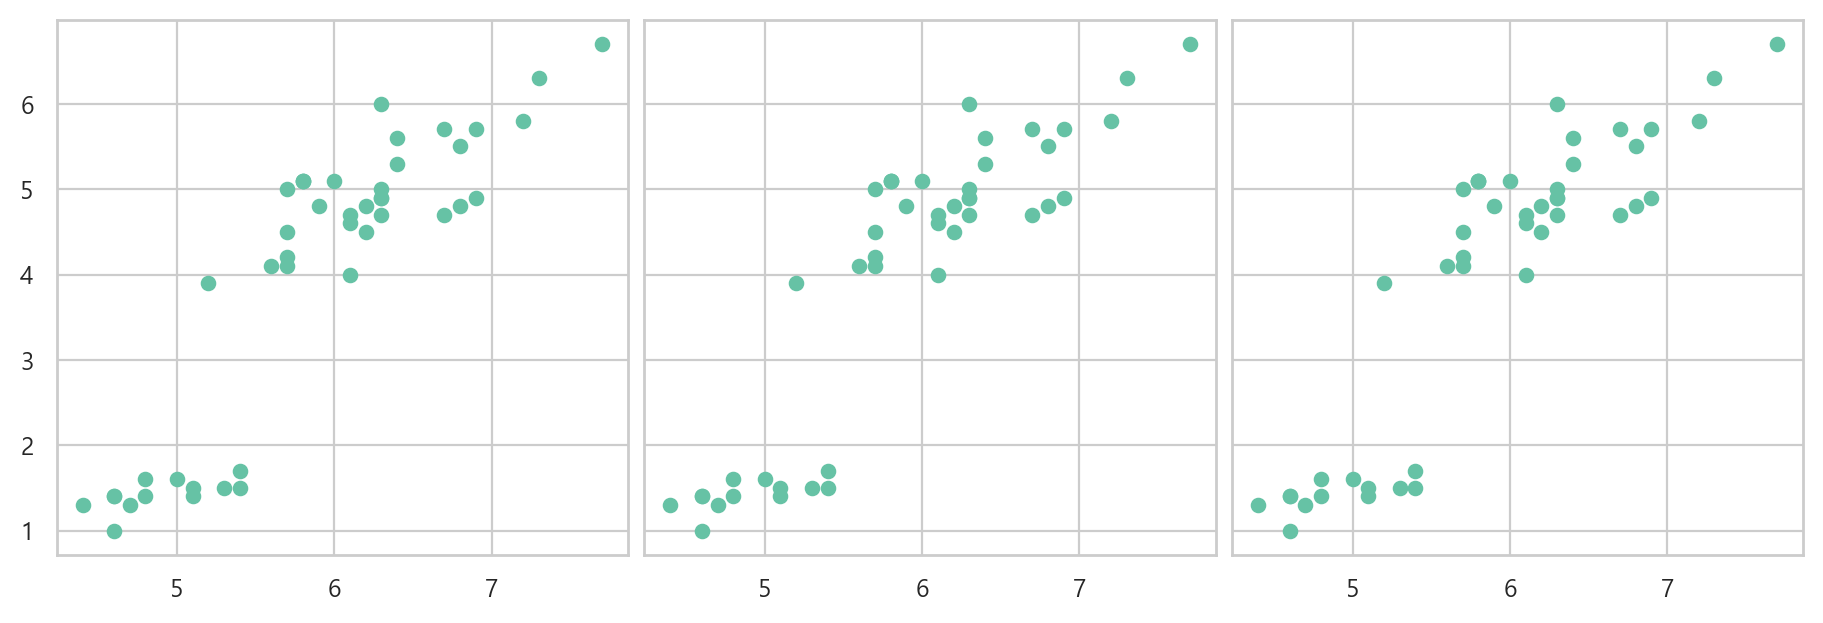

In [131]:
color = {test["Species"].unique()[0]: "tab:orange",
         test["knn_pred"].unique()[0]: "tab:blue",
         test["dtree"].unique()[0]: "tab:green"}

color_s = test["Species"].replace(color)
color_knn = test["knn_pred"].replace(color)
color_tree = test["dtree"].replace(color)

feature_x = width_col[0]
feature_y = width_col[1]

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex = True, sharey= True)

for n, c, ax in zip(["Origin", "k-NN Predict", "DT Predict"], 
                    [color_s, color_knn, color_tree], 
                    axes.flat):
    ax.scatter(x = test[feature_x],
               y = test[feature_y],)
            #    color=c)
    #            alpha=0.7)
    # ax.set_title(f"{n}")

# fig.supxlabel(f"{feature_x}")
# fig.supylabel(f"{feature_y}")

# axes[1].scatter(test[test["Species"] != test["knn pred"]][feature_x],
#                 test[test["Species"] != test["knn pred"]][feature_y],
#                 color = "black",
#                 marker = "x")

# axes[2].scatter(test[test["Species"] != test["tree pred"]][feature_x],
#                 test[test["Species"] != test["tree pred"]][feature_y],
#                 color = "tab:red",
#                 marker = "^")

plt.tight_layout();